# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# for warnings 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Acquire the Processed Data

In [2]:
#Reading the Processed data from original data.(Preprocessed in Data Processing)
inx = pd.read_excel("Processed_data.xlsx")
inx.head(10)

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
5,5,27,1,1,0,1,3,1,10,2,...,3,9,4,2,9,7,1,7,0,4
6,6,50,1,2,1,5,14,2,8,4,...,4,4,2,3,2,2,2,2,0,3
7,7,28,0,1,2,1,3,2,1,2,...,4,10,4,3,7,7,3,7,1,3
8,8,36,0,1,1,1,3,0,8,3,...,1,10,2,3,8,7,0,5,0,3
9,9,38,0,1,2,1,3,2,1,3,...,4,10,4,4,1,0,0,0,0,3


In [3]:
#Basic checks(data types, shape, tail and describe)
inx.shape

(1200, 28)

In [4]:
inx.tail(10)

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1190,1190,23,1,3,1,1,3,2,4,3,...,1,5,3,4,3,2,0,2,0,4
1191,1191,25,1,1,1,5,13,2,8,3,...,3,4,4,3,3,2,1,2,0,4
1192,1192,38,0,2,2,5,13,2,7,4,...,1,8,2,3,7,7,0,5,0,4
1193,1193,29,1,1,0,1,3,1,1,4,...,4,10,5,3,10,7,2,8,0,3
1194,1194,48,1,2,1,5,13,2,2,1,...,4,12,3,3,2,2,2,2,0,3
1195,1195,27,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,1196,37,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,1197,50,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,1198,34,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3
1199,1199,24,0,1,2,5,13,2,3,2,...,1,4,3,3,2,2,2,0,1,2


In [5]:
inx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Unnamed: 0                    1200 non-null   int64
 1   Age                           1200 non-null   int64
 2   Gender                        1200 non-null   int64
 3   EducationBackground           1200 non-null   int64
 4   MaritalStatus                 1200 non-null   int64
 5   EmpDepartment                 1200 non-null   int64
 6   EmpJobRole                    1200 non-null   int64
 7   BusinessTravelFrequency       1200 non-null   int64
 8   DistanceFromHome              1200 non-null   int64
 9   EmpEducationLevel             1200 non-null   int64
 10  EmpEnvironmentSatisfaction    1200 non-null   int64
 11  EmpHourlyRate                 1200 non-null   int64
 12  EmpJobInvolvement             1200 non-null   int64
 13  EmpJobLevel                   120

In [6]:
inx.describe()

,Unnamed: 0,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,36.918333,0.604167,2.23500,1.096667,3.215000,9.039167,1.595000,9.165833,2.89250,...,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,0.148333,2.948333
std,346.554469,9.087289,0.489233,1.31004,0.731050,1.696911,4.754451,0.679234,8.176636,1.04412,...,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.355578,0.518866
min,0.000000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,299.750000,30.000000,0.000000,1.00000,1.000000,1.000000,4.000000,1.000000,2.000000,2.00000,...,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,3.000000
50%,599.500000,36.000000,1.000000,2.00000,1.000000,4.000000,9.000000,2.000000,7.000000,3.00000,...,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000
75%,899.250000,43.000000,1.000000,3.00000,2.000000,5.000000,13.000000,2.000000,14.000000,4.00000,...,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,3.000000
max,1199.000000,60.000000,1.000000,5.00000,2.000000,5.000000,18.000000,2.000000,29.000000,5.00000,...,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000


# Exploratory Data Analysis

In [7]:
#Unnamed:0 column is not required.so dropping this column
inx.drop("Unnamed: 0",inplace=True,axis=1)

In [8]:
#Verify the features
inx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           1200 non-null   int64
 1   Gender                        1200 non-null   int64
 2   EducationBackground           1200 non-null   int64
 3   MaritalStatus                 1200 non-null   int64
 4   EmpDepartment                 1200 non-null   int64
 5   EmpJobRole                    1200 non-null   int64
 6   BusinessTravelFrequency       1200 non-null   int64
 7   DistanceFromHome              1200 non-null   int64
 8   EmpEducationLevel             1200 non-null   int64
 9   EmpEnvironmentSatisfaction    1200 non-null   int64
 10  EmpHourlyRate                 1200 non-null   int64
 11  EmpJobInvolvement             1200 non-null   int64
 12  EmpJobLevel                   1200 non-null   int64
 13  EmpJobSatisfaction            120

<Axes: >

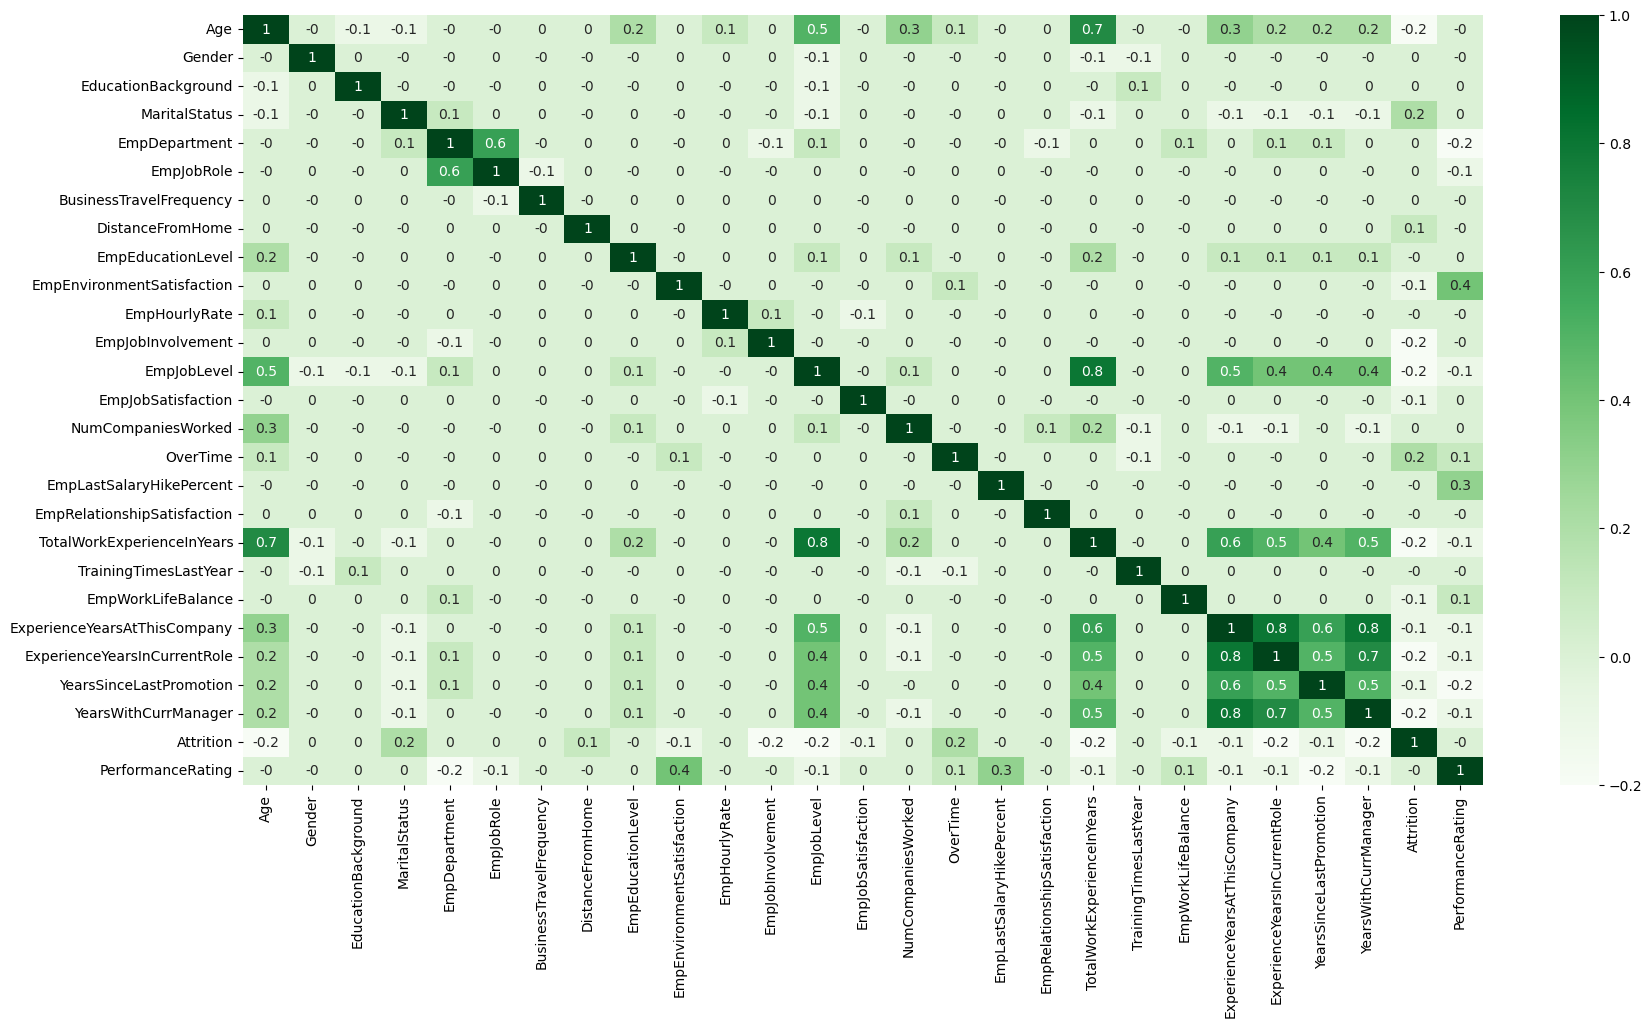

In [9]:
#Correlation
plt.figure(figsize=(20,10))
sb.heatmap(round(inx.corr(),1),annot=True,cmap='Greens')

# Feature Selection

Top 3 factors which effect the employee performance are:

1. EmpEnivornmentSatisfaction
2. EmpLastSalaryHikePercent
3. YearsSinceLastPromotion

In [10]:
inx.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [11]:
#feature-selection for models
#selecting features are Age, EmpDepartment, EmpJobRole, EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, 
#TotalWorkExperienceInYears, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, 
#YearsSinceLastPromotion
X = inx.iloc[:, [0,4,5,9,16,18,20,21,22,23]] 
X

,Age,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion
0,32,5,13,4,12,10,2,10,7,0
1,47,5,13,4,12,20,3,7,7,1
2,40,5,13,4,21,20,3,18,13,1
3,41,3,8,2,15,23,2,21,6,12
4,60,5,13,1,14,10,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...
1195,27,5,13,4,20,6,3,6,5,0
1196,37,1,15,4,17,4,3,1,0,0
1197,50,1,15,4,11,20,3,20,8,3
1198,34,0,1,4,14,9,4,8,7,7


In [12]:
y = inx.iloc[:,-1]
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

# Implementing Machine Learning Models

# Splitting Data into Train and Test sets

In [217]:
# Split data into train and test sets as well as for validation and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [218]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 10), (240, 10), (960,), (240,))

# SMOTE to oversample due to the skewness in target variable

Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [220]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [221]:
#smote on train and test sets
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)

In [222]:
X_train.shape, X_train_smote.shape, X_test.shape, X_test_smote.shape

((960, 10), (2070, 10), (240, 10), (552, 10))

In [223]:
y_train.shape, y_train_smote.shape, y_test.shape, y_test_smote.shape

((960,), (2070,), (240,), (552,))

# 1. Logistic Regression

In [224]:
#initialize the model
model_logr=LogisticRegression()

In [225]:
model_logr

LogisticRegression()

In [226]:
#train the model --> make model to learn from the train data
model_logr.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [227]:
#test the model --> we need to pass the input data
#predictions
y_predict_smote = model_logr.predict(X_test_smote)
y_predict_smote

array([2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2,
       0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1,
       2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,

In [228]:
print(classification_report(y_test_smote,y_predict_smote))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       184
           1       0.68      0.67      0.68       184
           2       0.77      0.78      0.78       184

    accuracy                           0.76       552
   macro avg       0.76      0.76      0.76       552
weighted avg       0.76      0.76      0.76       552



In [229]:
accuracy_score(y_test_smote,y_predict_smote)

0.7608695652173914

# 2. RandomForest Classifier

In [230]:
#Initialize the model
model_rf=RandomForestClassifier()

In [231]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [232]:
#Predicting the Model
y_predict_rf=model_rf.predict(X_test)
y_predict_rf

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1])

In [233]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.95      0.99      0.97       184
           2       1.00      0.74      0.85        27

    accuracy                           0.96       240
   macro avg       0.97      0.89      0.92       240
weighted avg       0.96      0.96      0.96       240



In [234]:
accuracy_score(y_test,y_predict_rf)

0.9583333333333334

# RandomForest Classification after SMOTE

In [235]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X, y, test_size=0.20, random_state=42)

In [236]:
#Initialize the model
model_rf1=RandomForestClassifier()

In [237]:
model_rf1.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [238]:
#Predicting the Model
y_predict_rf_smote=model_rf1.predict(X_test_smote)
y_predict_rf_smote

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1])

In [239]:
print(classification_report(y_test_smote,y_predict_rf_smote))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.95      0.99      0.97       184
           2       1.00      0.74      0.85        27

    accuracy                           0.96       240
   macro avg       0.97      0.89      0.92       240
weighted avg       0.96      0.96      0.96       240



In [240]:
accuracy_score(y_test,y_predict_rf)

0.9583333333333334